In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 72.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bank-customer-churn-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score


In [5]:
Customer_data = pd.read_csv('/content/Churn_Modelling.csv')
Customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
for columns in Customer_data.columns:
  print(columns)

RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


# Remove Unnecessary Columns

In [7]:
Customer_data = Customer_data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [8]:
Customer_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
labels_columns = ["Geography", "Gender"]
encoder = LabelEncoder()
for columns in labels_columns:
  Customer_data[columns] = encoder.fit_transform(Customer_data[columns])


In [10]:
Customer_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Data Visualizarion Part

# Distribution of churned vs retained customers

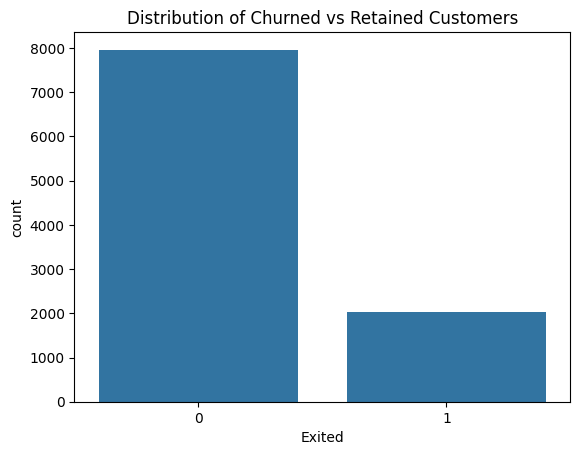

In [11]:
sns.countplot(x='Exited', data=Customer_data)
plt.title('Distribution of Churned vs Retained Customers')
plt.show()

# Credit Score vs Churn

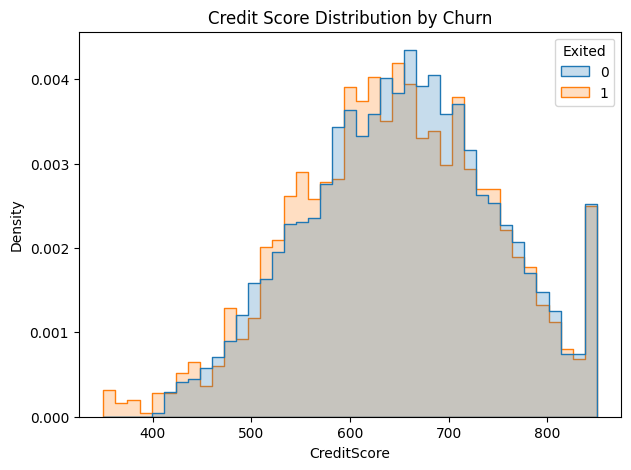

In [12]:
plt.figure(figsize=(7, 5))
sns.histplot(data=Customer_data, x='CreditScore', hue='Exited', element='step', stat='density', common_norm=False)
plt.title('Credit Score Distribution by Churn')
plt.show()

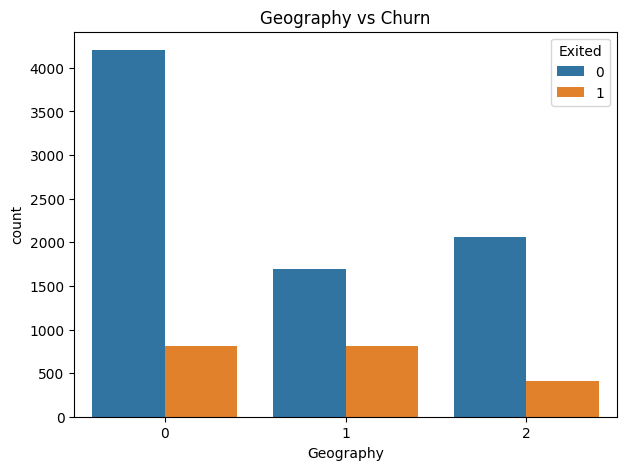

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Geography', hue='Exited', data=Customer_data)
plt.title('Geography vs Churn')
plt.show()

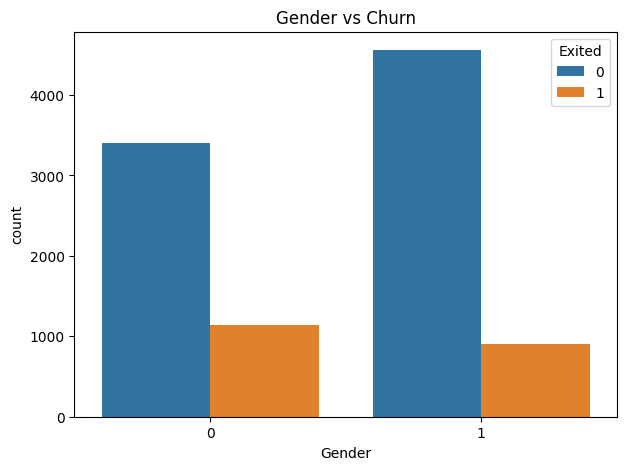

In [14]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', hue='Exited', data=Customer_data)
plt.title('Gender vs Churn')
plt.show()

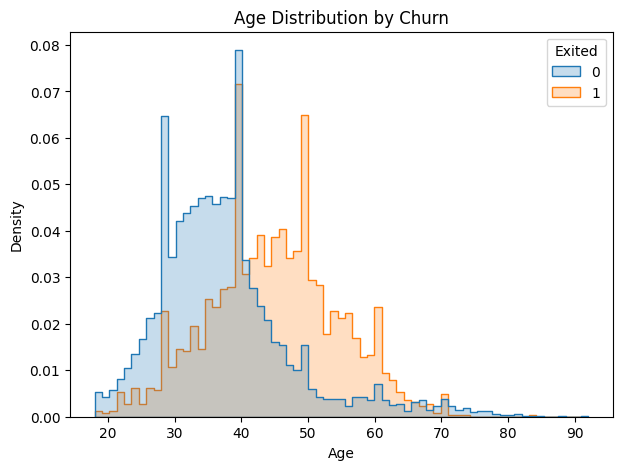

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(data=Customer_data, x='Age', hue='Exited', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Churn')
plt.show()

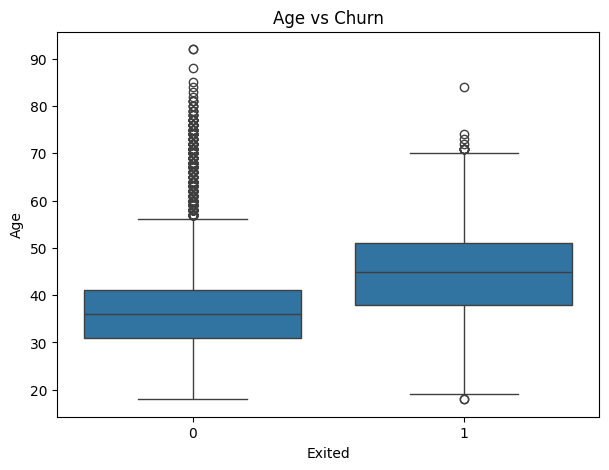

In [16]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Exited', y='Age', data=Customer_data)
plt.title('Age vs Churn')
plt.show()

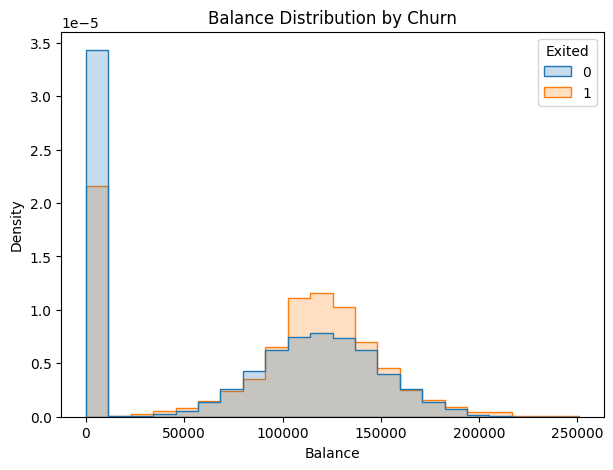

In [17]:
plt.figure(figsize=(7, 5))
sns.histplot(data=Customer_data, x='Balance', hue='Exited', element='step', stat='density', common_norm=False)
plt.title('Balance Distribution by Churn')
plt.show()

# Estimated Salary vs Churn

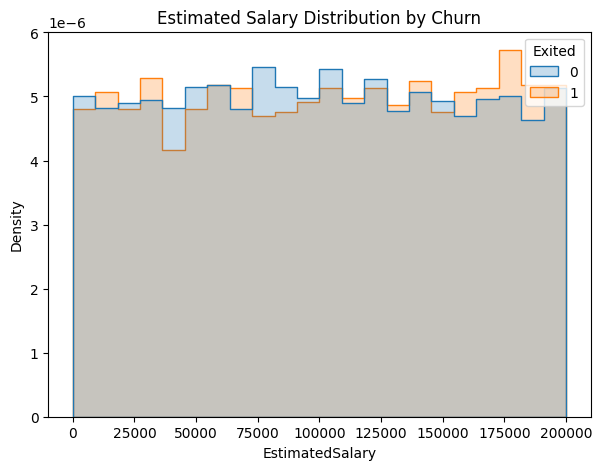

In [18]:
plt.figure(figsize=(7, 5))
sns.histplot(data=Customer_data, x='EstimatedSalary', hue='Exited', element='step', stat='density', common_norm=False)
plt.title('Estimated Salary Distribution by Churn')
plt.show()

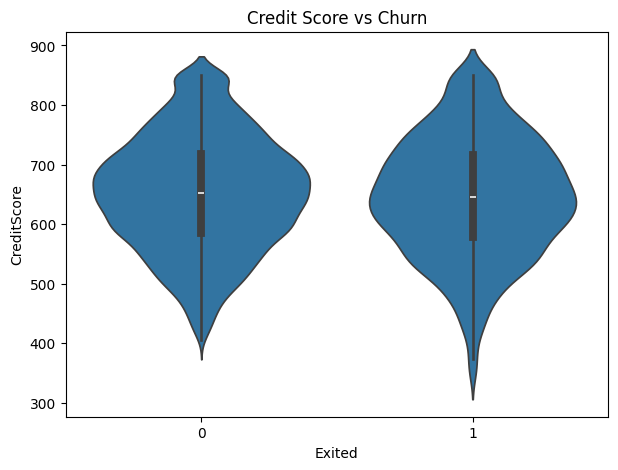

In [19]:
plt.figure(figsize=(7, 5))
sns.violinplot(x='Exited', y='CreditScore', data=Customer_data)
plt.title('Credit Score vs Churn')
plt.show()

# Selecting a subset of columns for pair plot

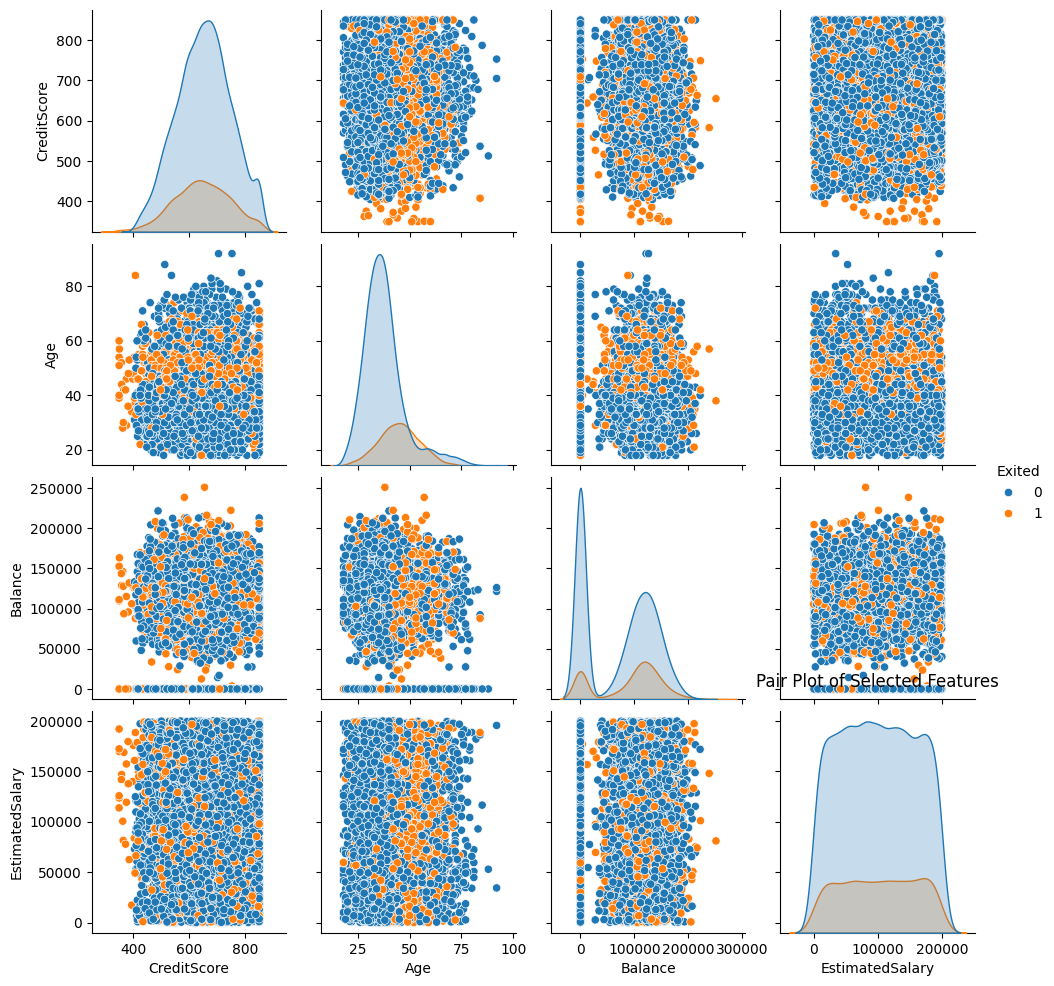

In [20]:
subset_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(Customer_data[subset_columns], hue='Exited')
plt.title('Pair Plot of Selected Features')
plt.show()

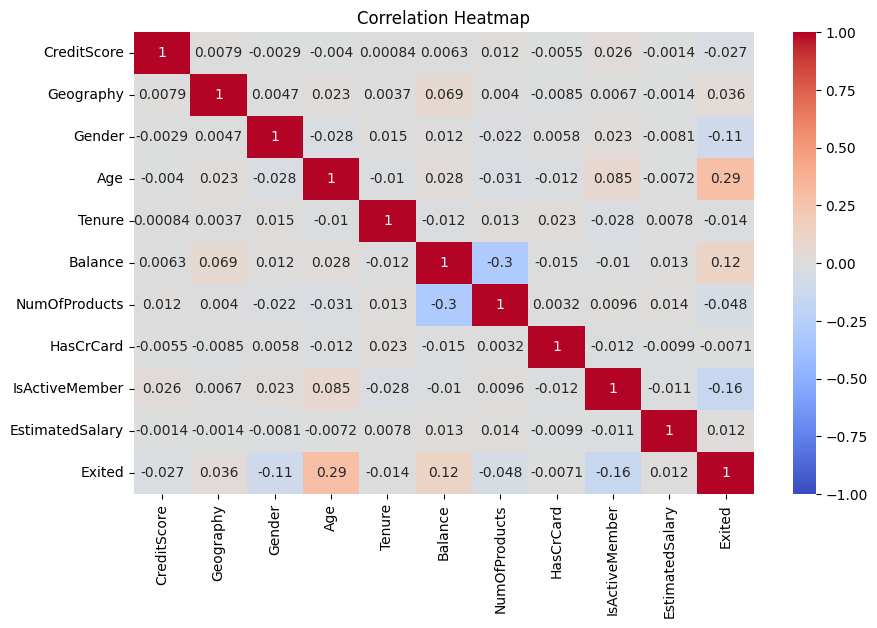

In [21]:
plt.figure(figsize=(10, 6))
correlation_matrix = Customer_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

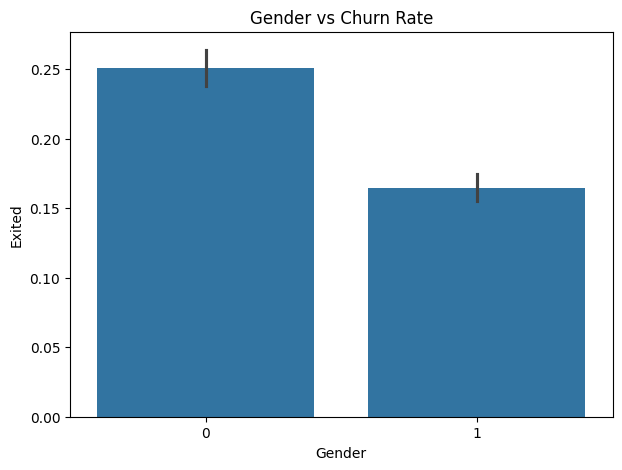

In [22]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Gender', y='Exited', data=Customer_data, estimator=lambda x: sum(x==1)/len(x))
plt.title('Gender vs Churn Rate')
plt.show()


# Convert Data into Traing and Testing part

In [23]:
X = Customer_data.drop('Exited', axis=1)
y = Customer_data['Exited']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Models

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [28]:
model_name = []
model_accuracy = []
model_precision = []
model_recall = []
model_f1_score = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    precision = np.mean(np.logical_and(y_pred == 1, y_test == 1))
    recall = np.mean(np.logical_and(y_pred == 1, y_test == 1))
    f1_score = 2 * (precision * recall) / (precision + recall)
    model_accuracy.append(accuracy)
    model_precision.append(precision)
    model_recall.append(recall)
    model_f1_score.append(f1_score)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Precision: {precision:.2f}')
    print(f'{model_name} Recall: {recall:.2f}')
    print(f'{model_name} F1 Score: {f1_score:.2f}')
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression Accuracy: 0.20
Logistic Regression Precision: 0.20
Logistic Regression Recall: 0.20
Logistic Regression F1 Score: 0.20



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random Forest Accuracy: 0.44
Random Forest Precision: 0.06
Random Forest Recall: 0.06
Random Forest F1 Score: 0.06

Gradient Boosting Accuracy: 0.72
Gradient Boosting Precision: 0.03
Gradient Boosting Recall: 0.03
Gradient Boosting F1 Score: 0.03



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [29]:
accuracy_scores = []
model_names = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    model_names.append(name)
    print(f"Accuracy of {name}: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Training Logistic Regression...
Accuracy of Logistic Regression: 0.815
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
[[1559   48]
 [ 322   71]]

Training Random Forest...
Accuracy of Random Forest: 0.868
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:
[[1554   53]
 [ 211  182]]

Training Gradient Boosting...
Accuracy of Gradient Boosting: 0.866
Classificat

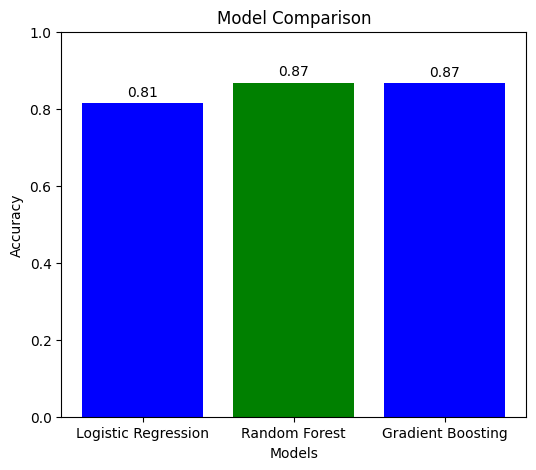

In [30]:
plt.figure(figsize=(6, 5))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Assuming accuracy is a value between 0 and 1
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

In [31]:
import joblib
for name, model in models.items():
    joblib.dump(model, f'{name}.pkl')